<a href="https://colab.research.google.com/github/Trilokesh-Praxis-2023/Churn-Analysis/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='Blue'> Bank Customer Churn. </font>

#### Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

## <font color='blue'> 1. Importing Dataset. </font>

#### Here we are reading the database using the name "df" in the variable.

In [2]:
df = pd.read_csv('Customer-Churn-Records.csv', sep = ',')

#### Here we can see that we have categorical and continuous variables, we can also see that we don't have null values.

- RowNumber: corresponds to the record (row) number and has no effect on the output.
- CustomerId: contains random values and has no effect on customer leaving the bank.
- Surname: the surname of a customer has no impact on their decision to leave the bank.
- CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography: a customer’s location can affect their decision to leave the bank.
- Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts: refers to the number of products that a customer has purchased through the bank.
- HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember: active customers are less likely to leave the bank.
- EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited: whether or not the customer left the bank.
- Complain: customer has complaint or not.
- Satisfaction Score: Score provided by the customer for their complaint resolution.
- Card Type: type of card hold by the customer.
- Points Earned: the points earned by the customer for using credit card.

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
(df.isnull().sum()/len(df))

RowNumber             0.0
CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64

### No missing values

## <font color='blue'> 2. Data Analysis. </font>

#### Verifying the correlation between our variables.
- Here, looking at the correlation of our variables, we can see that we have 100% correlation between the target variables and the Complain variable, so let's eliminate the Complain variable.

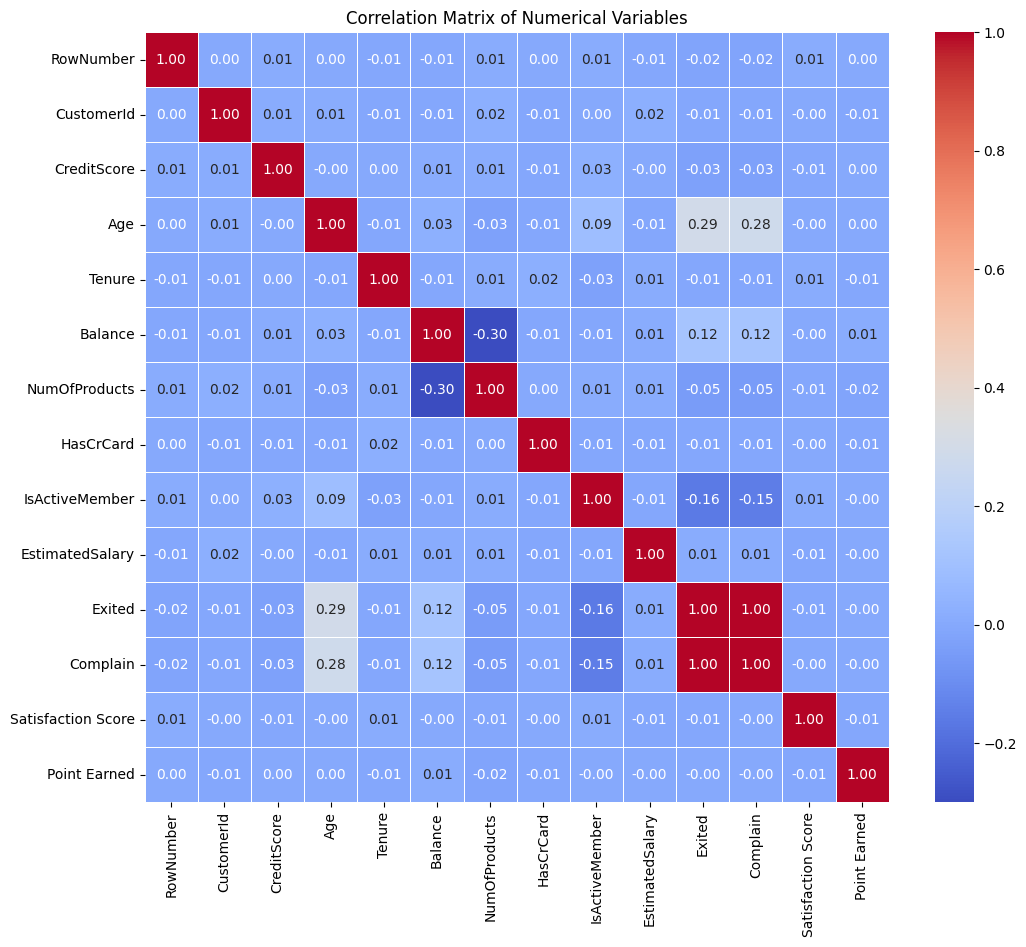

In [6]:
# Select only numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr = numerical_df.corr().round(2)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [7]:
df = df.drop('Complain', axis = 1)

#### Categorical Variables.

#### Looking at our categorical variables we can see that most of our variables are well distributed, we can see that our customers are mostly from France, with the gender variable well distributed, and usually with 1 or 2 products, a very important thing is that we see that our target variable is not well distributed, we will probably have to balance the class.

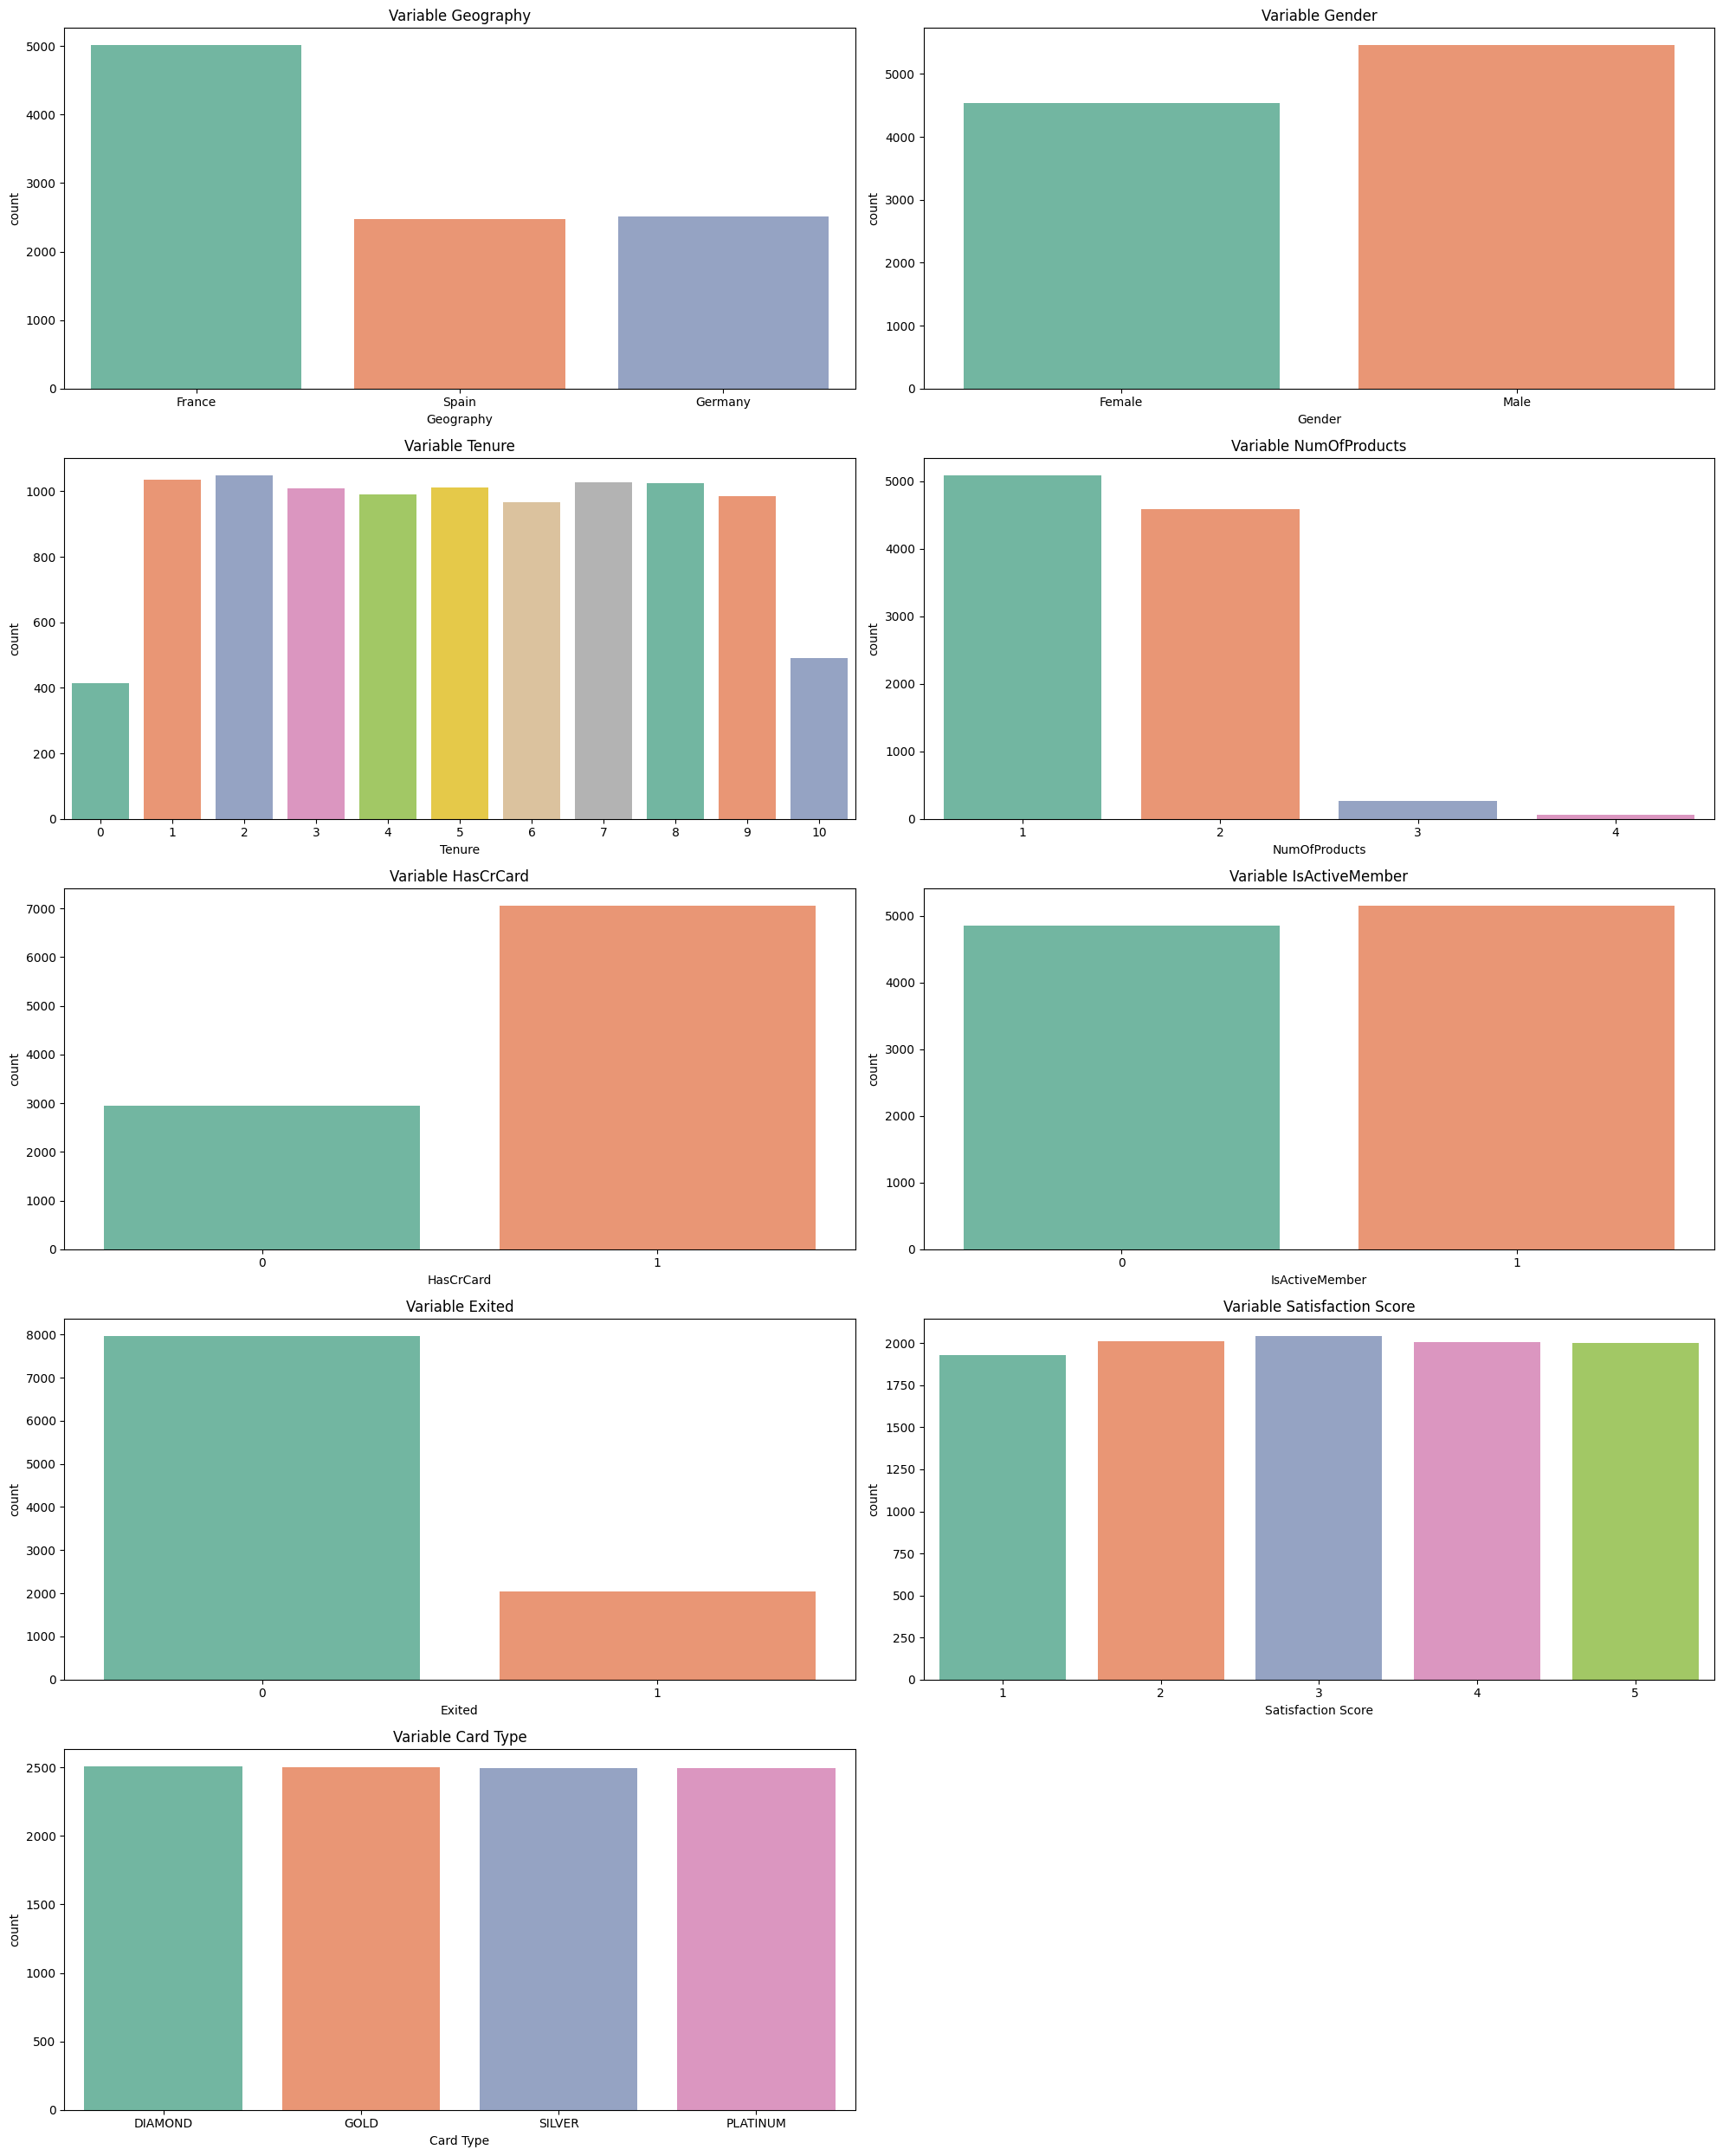

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 25))

variables = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Satisfaction Score', 'Card Type']

for i, variable in enumerate(variables, start=1):
    plt.subplot(5, 2, i)
    plt.gca().set_title(f'Variable {variable}')
    sns.countplot(x=variable, palette='Set2', hue=variable, data=df, legend=False)

plt.tight_layout()
plt.show()


#### Outlier detection

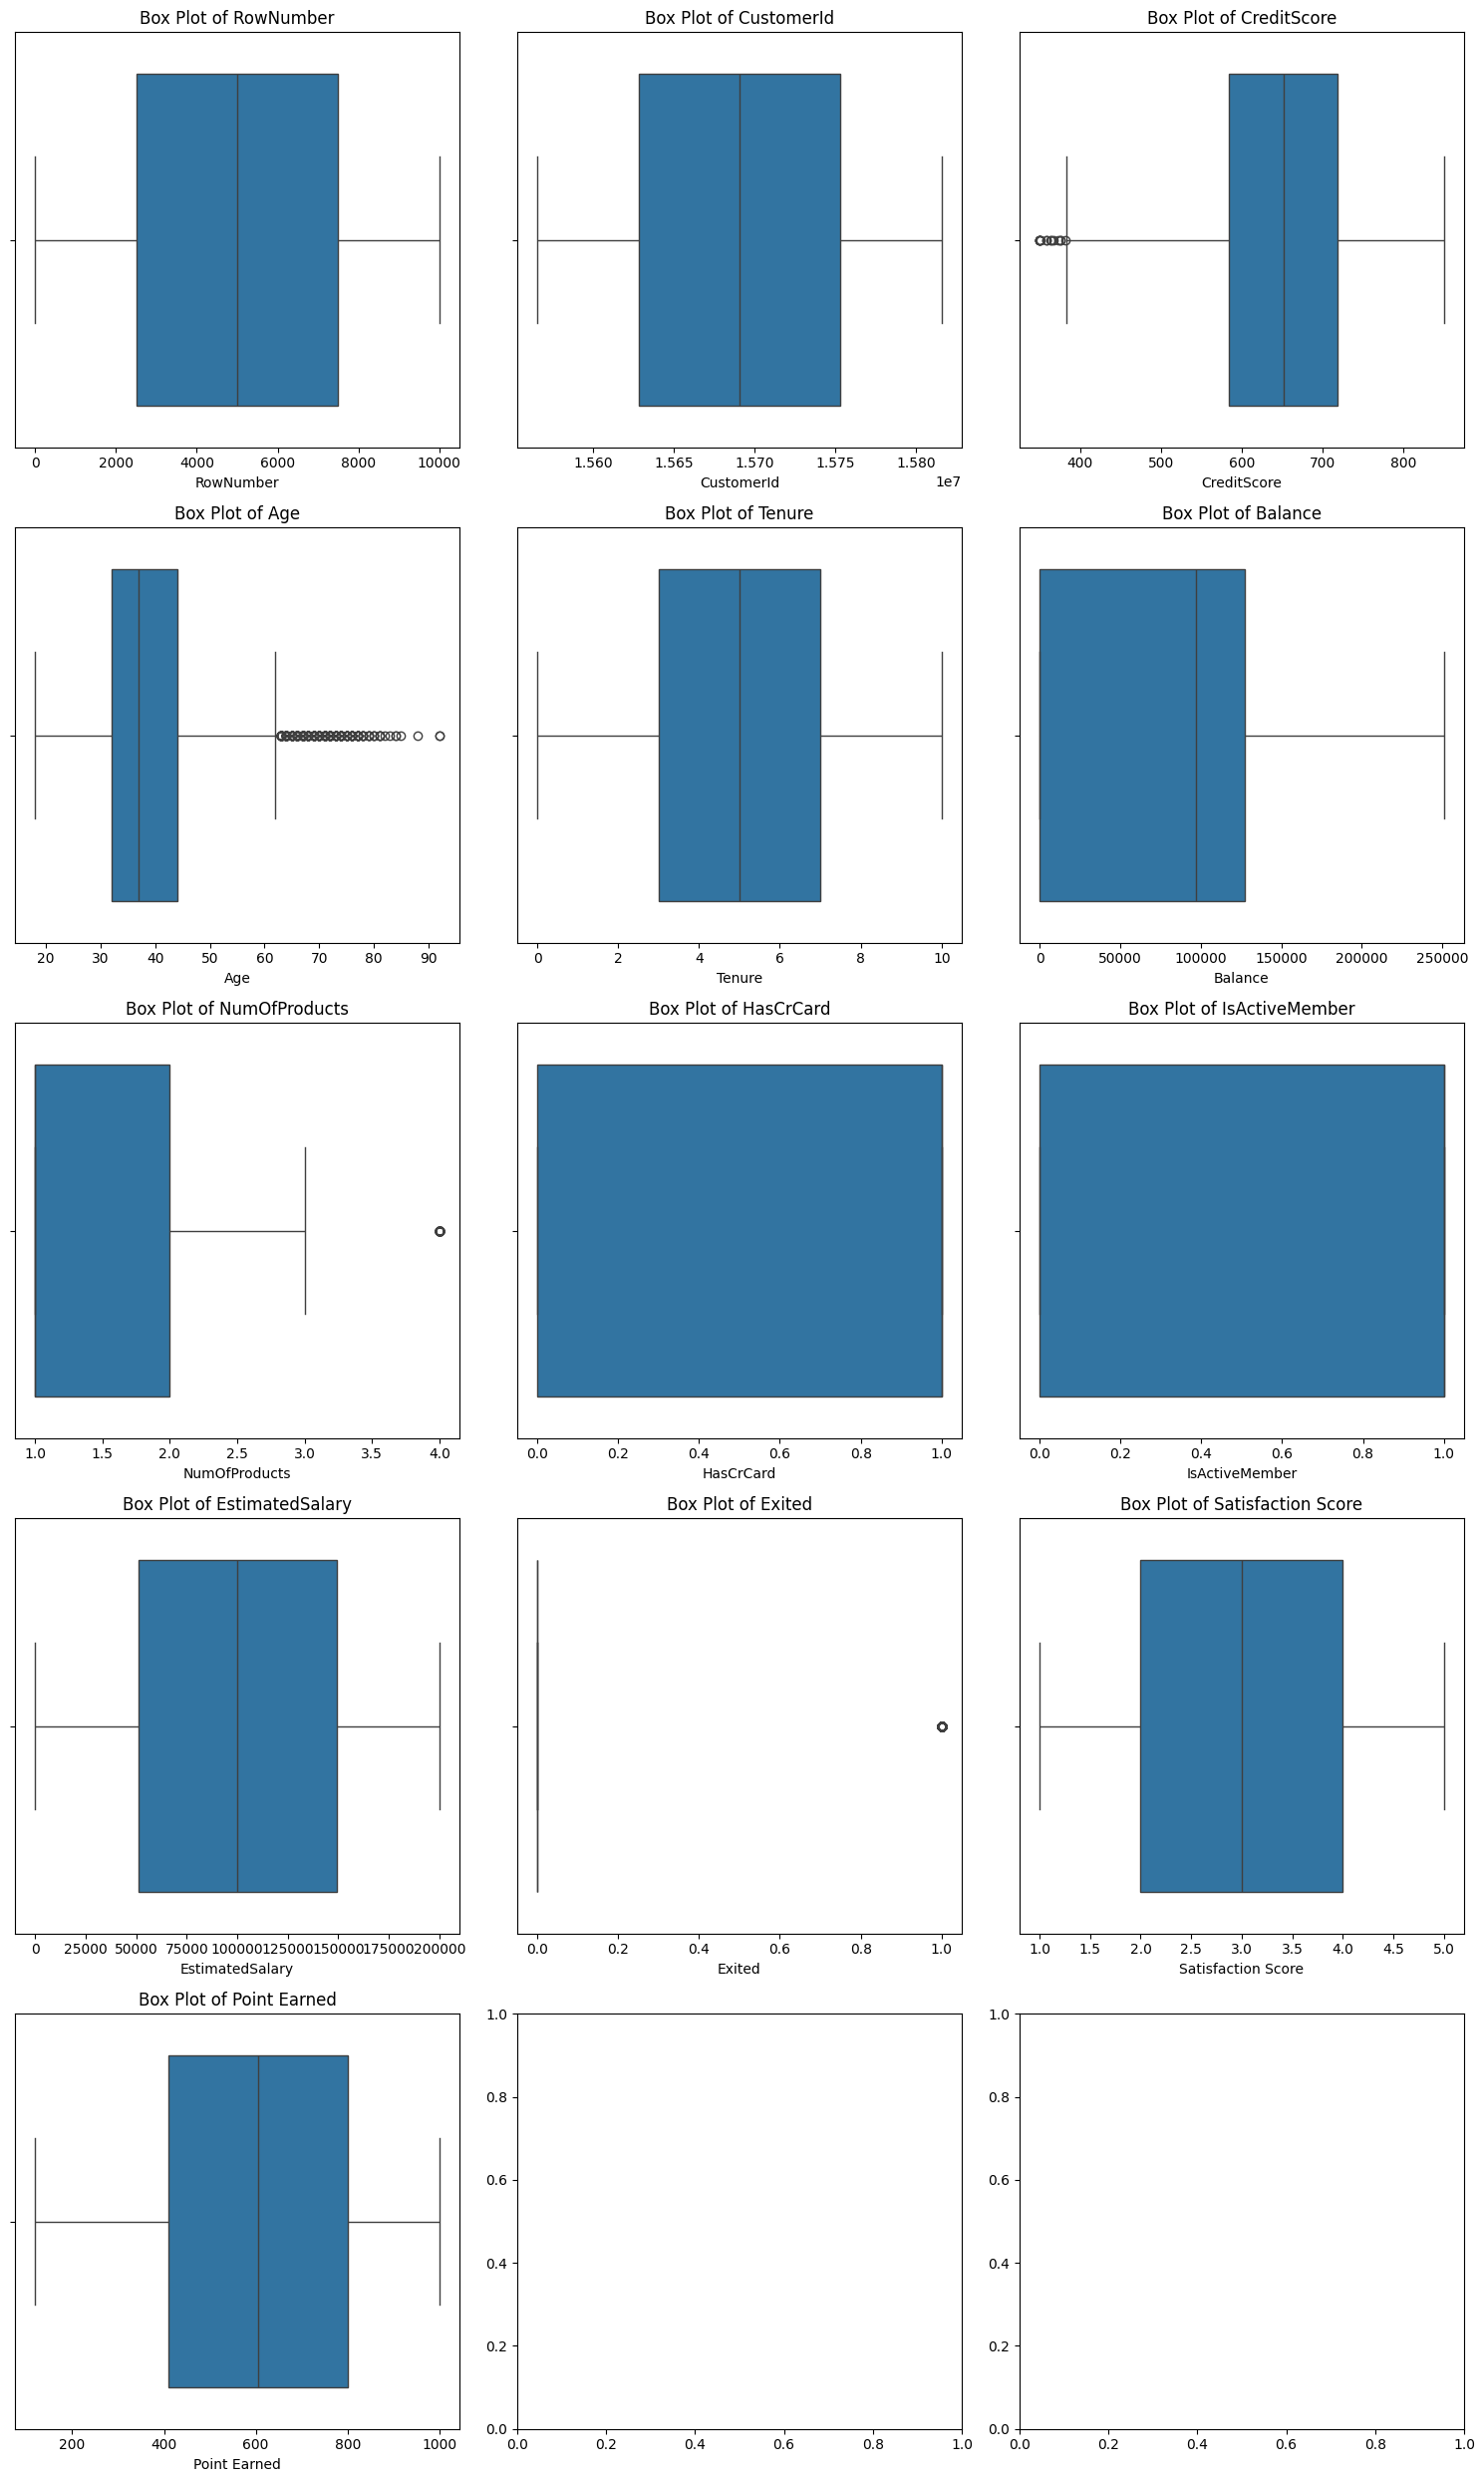

In [9]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = 3
num_rows = -(-len(numeric_columns) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


#### There are anomalies in age and credit score

#### Bivariate Analysis.

#### Comparing our categorical variables with our target variable I cannot see any variable that has a very different behavior between the positive and negative result.

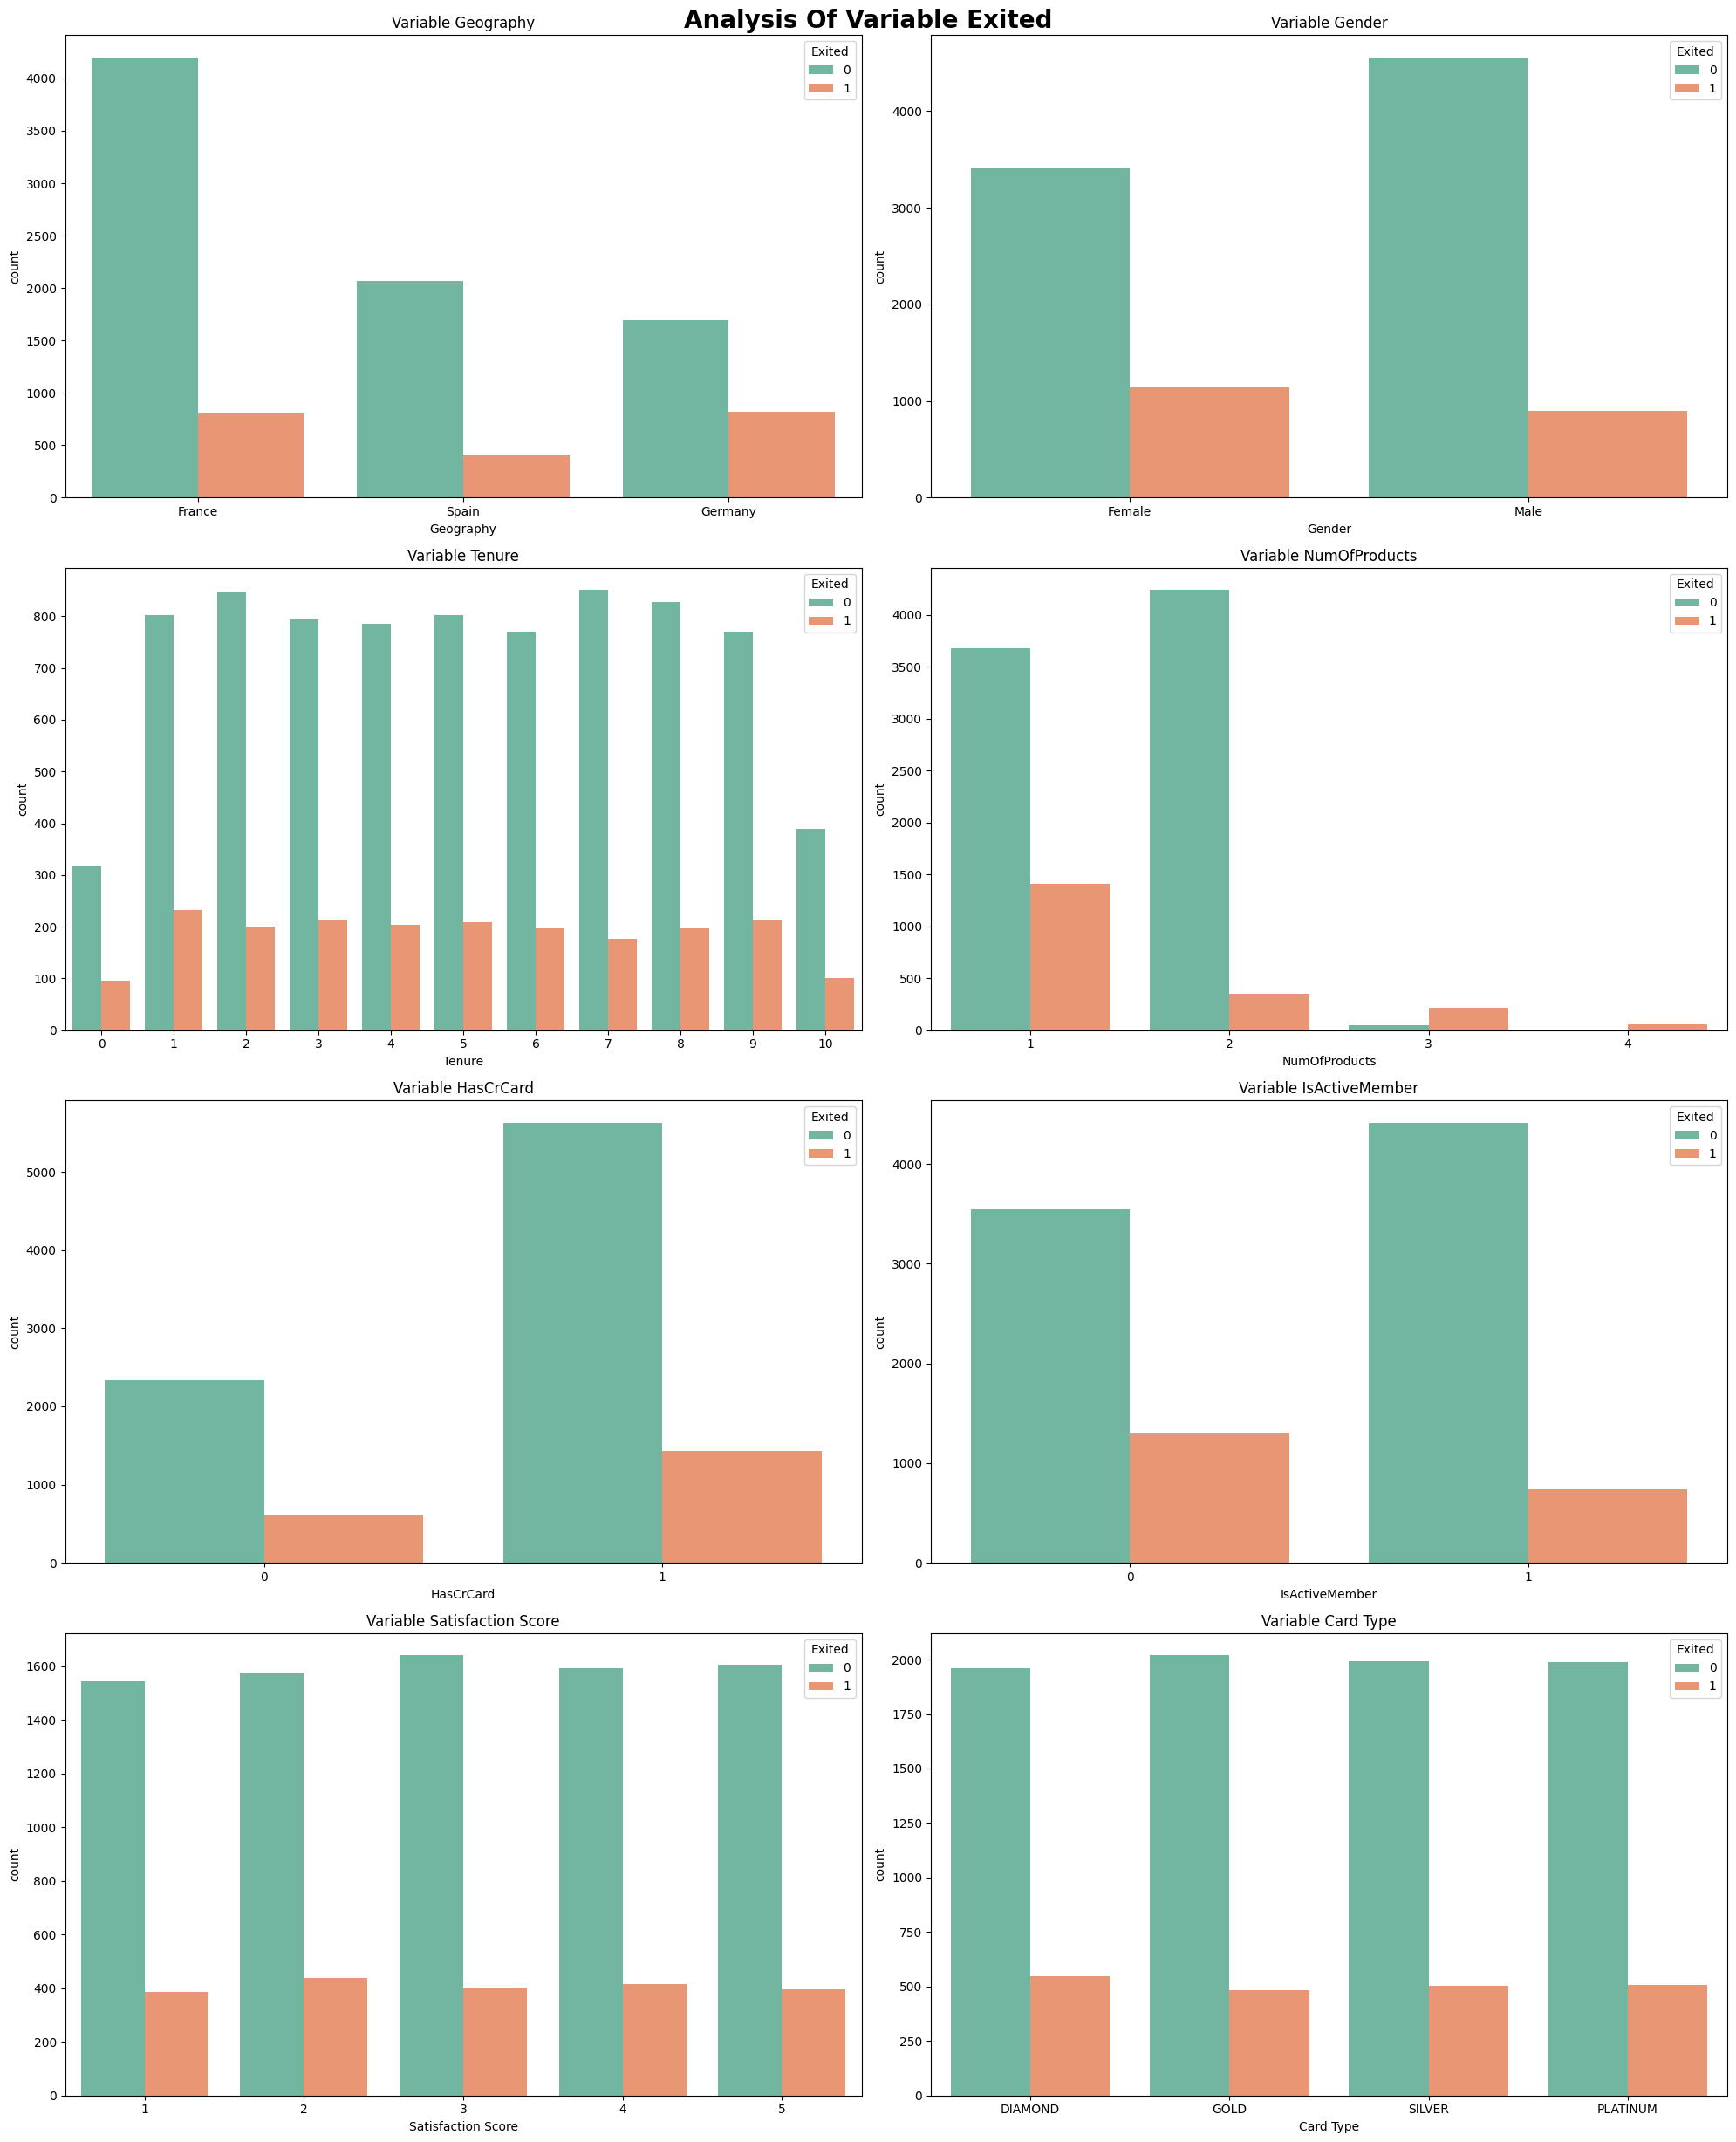

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 25))
plt.suptitle("Analysis Of Variable Exited", fontweight="bold", fontsize=20)

variables = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Satisfaction Score', 'Card Type']

for i, variable in enumerate(variables, start=1):
    plt.subplot(4, 2, i)
    plt.gca().set_title(f'Variable {variable}')
    sns.countplot(x=variable, hue='Exited', palette='Set2', data=df)

plt.tight_layout()
plt.show()


#### Here, looking at the continuous variables, one variable that caught my attention was the Age variable, where we can see that older ages are more likely to have a positive result.

<Axes: xlabel='Exited', ylabel='Point Earned'>

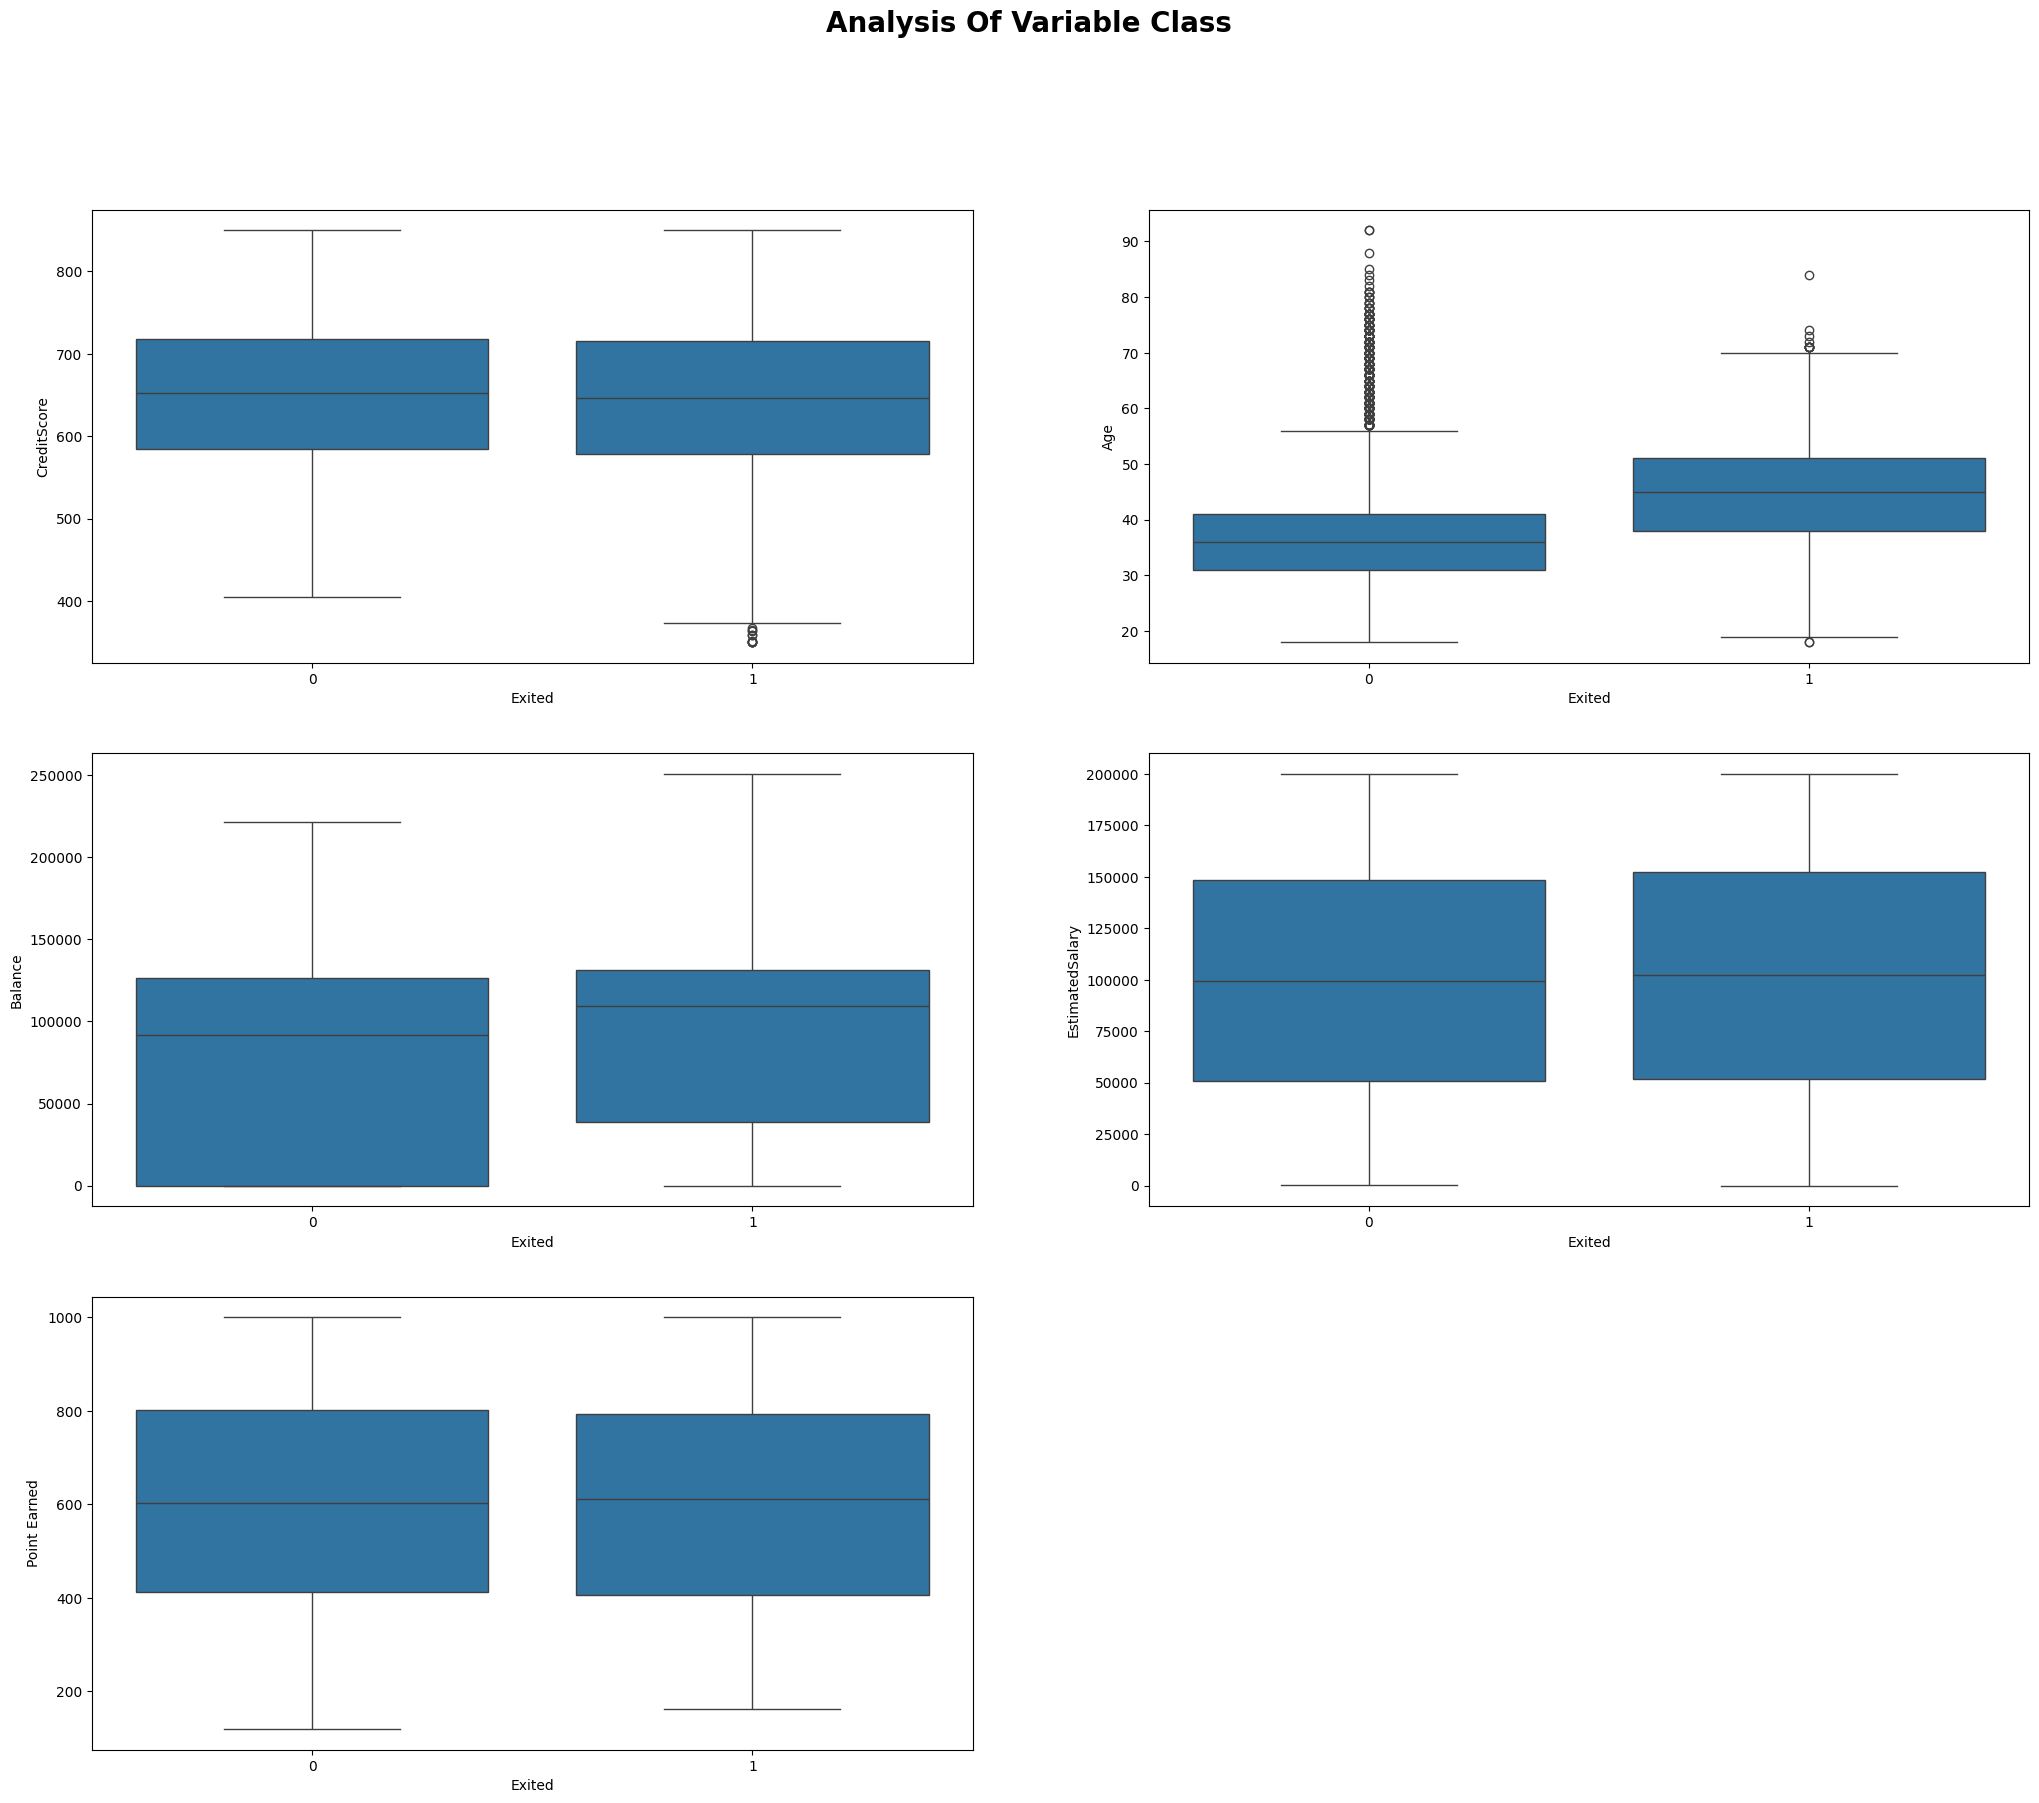

In [11]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Class",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="Exited", y="Age", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="Point Earned", data=df)

### Outlier Handling

In [12]:
import pandas as pd

# Function to replace outliers with median
def replace_outliers_with_median(df, column):
    median = df[column].median()
    std_dev = df[column].std()
    outliers = (df[column] - median).abs() > 3 * std_dev  # Using a threshold of 3 standard deviations
    df.loc[outliers, column] = median

# Assuming your DataFrame is named df
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numeric_columns:
    replace_outliers_with_median(df, column)


## <font color='blue'> 3. Model Building. </font>

#### Here we will eliminate the RowNumber, CustomerID and Surname variables that will not be used in the model.

In [13]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

####  Encoder
- Here we are going to use the OneHotLabel Encoder to transform our Gender feature continuous variables.
- for rest used Lable encoding

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encode non-numeric columns except 'Gender'
label_encoder = LabelEncoder()
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns.drop('Gender')
df[non_numeric_columns] = df[non_numeric_columns].apply(lambda x: label_encoder.fit_transform(x))

# Label encode 'Gender' column
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# One-hot encode 'Gender' column
one_hot_encoder = OneHotEncoder()
gender_encoded = one_hot_encoder.fit_transform(df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded.toarray(), columns=[f'Gender_{int(cat)}' for cat in df['Gender'].unique()])

# Concatenate one-hot encoded 'Gender' column with the DataFrame
df = pd.concat([df, gender_encoded_df], axis=1).drop(columns=['Gender'])


#### Separating into features variables and target variable.

In [15]:
X = df.drop('Exited', axis = 1)
X = X.values
y = df['Exited']

In [16]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from collections import Counter

def custom_smote(X, y, random_state=None):
    np.random.seed(random_state)

    # Identify minority class
    counter = Counter(y)
    minority_class = min(counter, key=counter.get)

    # Separate minority and majority class samples
    X_minority = X[y == minority_class]
    n_samples_to_generate = Counter(y).most_common(1)[0][1] - counter[minority_class]

    # Fit Nearest Neighbors model
    nn = NearestNeighbors(n_neighbors=5).fit(X_minority)
    indices = nn.kneighbors(X_minority, return_distance=False)

    # Generate synthetic samples
    synthetic_samples = [X_minority[i] + np.random.rand() * (X_minority[j] - X_minority[i])
                         for i in range(len(X_minority))
                         for j in indices[i, 1:]]
    X_synthetic = np.array(synthetic_samples[:n_samples_to_generate])

    # Concatenate original and synthetic samples
    X_resampled = np.vstack((X, X_synthetic))
    y_resampled = np.hstack((y, np.array([minority_class] * n_samples_to_generate)))

    return X_resampled, y_resampled



In [17]:
# Example usage:
# Separate features and target variable
X = df.drop('Exited', axis=1).values
y = df['Exited'].values

# Apply custom SMOTE
X_resampled, y_resampled = custom_smote(X, y, random_state=42)

# Print the resampled class counts
print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_resampled))

Original dataset shape: Counter({0: 7962, 1: 2038})
Resampled dataset shape: Counter({1: 7962, 0: 7962})


#### StandardScaler
- Here we will use StandardScaler to put our data in the same scale.

In [18]:
from sklearn.preprocessing import StandardScaler
# Apply standard scaling
scaler = StandardScaler()
X_resampled_standard = scaler.fit_transform(X_resampled)

#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [19]:
# Split the resampled and scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_standard, y_resampled, test_size=0.3, random_state=0)


# Model Building

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize classifiers
classifiers = [
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    GradientBoostingClassifier(random_state=0),
    SVC(random_state=0),
    XGBClassifier(random_state=0)
]

# Initialize an empty list to store evaluation metrics
metrics_list = []

# Train and evaluate each classifier
for clf in classifiers:
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics in a dictionary
    metrics_dict = {
        'Classifier': clf.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

    # Append metrics dictionary to the list
    metrics_list.append(metrics_dict)


- Precision – Of all the users that the algorithm predicts will churn, how many of them do actually churn?
- Recall – What percentage of users that end up churning does the algorithm successfully find?

In [21]:
# Create a DataFrame from the list of dictionaries
metrics_df = pd.DataFrame(metrics_list)

# Sort the DataFrame in descending order based on accuracy
metrics_df_sorted = metrics_df.sort_values(by='Precision', ascending=False)

# Print the sorted DataFrame
print(metrics_df_sorted)


                   Classifier  Accuracy  Precision    Recall  F1-score
2      RandomForestClassifier  0.903516   0.929705  0.870119  0.898926
3  GradientBoostingClassifier  0.905190   0.928025  0.875637  0.901070
5               XGBClassifier  0.901423   0.919448  0.876910  0.897675
4                         SVC  0.860820   0.874612  0.837861  0.855842
1      DecisionTreeClassifier  0.845961   0.835265  0.856537  0.845767
0          LogisticRegression  0.759941   0.743652  0.783107  0.762870


#### In churn analysis, prioritizing precision minimizes false positives, ensuring accurate identification of potential churners, while maintaining a balance with recall to capture genuine churners effectively.

- Random Forest Gave best results

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2422
           1       0.93      0.87      0.90      2356

    accuracy                           0.90      4778
   macro avg       0.91      0.90      0.90      4778
weighted avg       0.91      0.90      0.90      4778



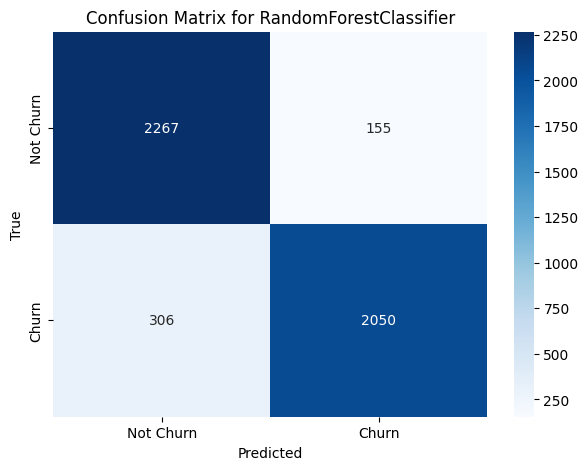

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Calculate the classification report
print("Classification Report for RandomForestClassifier:")
print(classification_report(y_test, y_pred_rf))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

## Analysing Top Featurs effecting Churn

In [23]:
! pip -q install shap

In [25]:
import shap
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X)

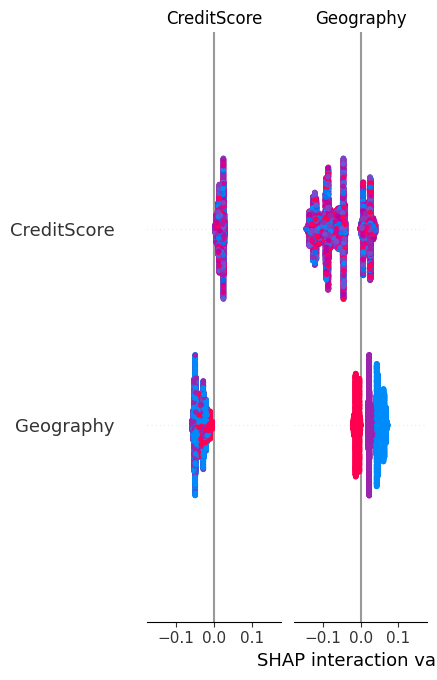

In [35]:
shap.summary_plot(shap_values, X)